In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
#from intake import open_catalog
import cartopy.io.shapereader as shpreader
import mygrads as mg
#import Ngl
#import Nio
#import fiona
import matplotlib as mpl
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.feature import NaturalEarthFeature
from cartopy.feature import COASTLINE
from clim680_function import xyticks

### U and v wind data now averaged over an entire day

In [2]:
f= '/project/xprecip/merra2_ncfiles/winds/winds_morelevels_mean_9-20-22/*.nc'
DS_wind=xr.open_mfdataset(f)
DS_wind

,Array,Chunk
Bytes,14.93 GB,958.24 kB
Shape,"(62336, 10, 53, 113)","(4, 10, 53, 113)"
Count,46752 Tasks,15584 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,14.93 GB,958.24 kB
Shape,"(62336, 10, 53, 113)","(4, 10, 53, 113)"
Count,46752 Tasks,15584 Chunks
Type,float32,numpy.ndarray


In [3]:
u_computed=DS_wind.U.compute()
u_computed

<xarray.DataArray 'U' (time: 62336, lev: 10, lat: 53, lon: 113)>
array([[[[-9.30539787e-01, -9.34120774e-01, -7.84232199e-01, ...,
           1.73901653e+00,  7.42269039e-01,  3.21041644e-01],
         [-6.08684182e-01, -8.26584637e-01, -1.08721757e+00, ...,
           2.08498502e+00,  1.54040134e+00,  9.00530636e-01],
         [-1.91116661e-01, -7.08295703e-01, -1.30246127e+00, ...,
           1.97059107e+00,  1.93536341e+00,  1.94508660e+00],
         ...,
         [ 7.28172684e+00,  5.29602671e+00,  6.26182079e+00, ...,
           1.16468086e+01,  1.33204260e+01,  1.29635363e+01],
         [-3.05532247e-01,  1.87901986e+00,  1.49058664e+00, ...,
           8.57213211e+00,  1.03550692e+01,  9.97807217e+00],
         [-5.46053946e-01, -2.00550890e+00, -3.94652534e+00, ...,
           4.70101309e+00,  6.07517052e+00,  6.10477638e+00]],

        [[ 1.50798842e-01,  1.03337340e-01,  4.57769066e-01, ...,
           2.14272618e+00,  1.06560099e+00,  7.70642936e-01],
         [ 4.57519472e-01,  3.20713520e-01,  3.04071426e-01, ...,
           2.64918780e+00,  2.06389356e+00,  1.50986540e+00],
         [ 8.12928498e-01,  3.85377169e-01, -1.05678253e-01, ...,
           2.51147914e+00,  2.51180077e+00,  2.53972483e+00],
...
           7.72486973e+00,  7.69809723e+00,  7.70723867e+00],
         [ 2.67195916e+00,  3.59363079e+00,  4.77289867e+00, ...,
           8.29383469e+00,  8.33547115e+00,  8.23211098e+00],
         [ 2.91866970e+00,  3.75769424e+00,  5.20736837e+00, ...,
           8.96831799e+00,  9.07561111e+00,  8.84980774e+00]],

        [[-7.29653025e+00, -6.74663019e+00, -6.21113873e+00, ...,
          -2.13187718e+00, -2.22443056e+00, -2.20938492e+00],
         [-6.83312035e+00, -6.89110899e+00, -6.18476248e+00, ...,
          -2.24720573e+00, -2.20992684e+00, -2.19794035e+00],
         [-6.26718521e+00, -6.66657448e+00, -6.28304291e+00, ...,
          -2.46354365e+00, -2.21935225e+00, -2.36590838e+00],
         ...,
         [ 3.68001580e+00,  4.57980013e+00,  5.76394081e+00, ...,
           6.45220423e+00,  6.25036669e+00,  6.29402447e+00],
         [ 2.97186780e+00,  3.90156031e+00,  4.49521065e+00, ...,
           6.74018431e+00,  6.64415169e+00,  6.74996471e+00],
         [ 3.55547166e+00,  3.69995999e+00,  4.29068041e+00, ...,
           7.42070818e+00,  7.60764790e+00,  7.63020611e+00]]]],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 ... 2022-08-31T18:00:00
  * lon      (lon) float64 -126.2 -125.6 -125.0 -124.4 ... -57.5 -56.88 -56.25
  * lat      (lat) float64 24.5 25.0 25.5 26.0 26.5 ... 48.5 49.0 49.5 50.0 50.5
  * lev      (lev) float64 825.0 800.0 775.0 750.0 ... 650.0 600.0 550.0 500.0
Attributes:
    standard_name:   eastward_wind
    long_name:       Eastward wind component
    units:           m/s
    fmissing_value:  1000000000000000.0
    vmax:            1000000000000000.0
    vmin:            -1000000000000000.0

In [4]:
u_computed.to_netcdf('/project/xprecip/merra2_ncfiles/winds/winds_morelevels_mean_9-20-22/winds_computed/u_computed.nc')

In [5]:
v_computed=DS_wind.V.compute()
v_computed

<xarray.DataArray 'V' (time: 62336, lev: 10, lat: 53, lon: 113)>
array([[[[  0.59525955,  -0.83496433,  -1.7888072 , ...,   2.6904893 ,
            2.390315  ,   2.7885902 ],
         [  0.53164065,  -1.0483259 ,  -2.0811348 , ...,   3.834536  ,
            3.3374453 ,   3.235387  ],
         [  0.67161924,  -0.8587301 ,  -2.025537  , ...,   3.8140585 ,
            3.990789  ,   3.7861066 ],
         ...,
         [ 14.162079  ,  17.033533  ,  18.20719   , ..., -12.6891165 ,
          -14.288915  , -15.230017  ],
         [ 14.959863  ,  16.247658  ,  17.820955  , ..., -13.320434  ,
          -14.658893  , -14.323477  ],
         [ 14.386181  ,  16.205877  ,  17.290384  , ..., -14.473512  ,
          -15.8391285 , -15.224154  ]],

        [[  0.94791913,  -0.3233605 ,  -1.3815993 , ...,   2.9422293 ,
            2.5823102 ,   2.989498  ],
         [  0.79927903,  -0.822246  ,  -1.9535631 , ...,   4.1001835 ,
            3.5316594 ,   3.312929  ],
         [  0.7737919 ,  -0.8647059 ,  -1.9051858 , ...,   4.1082435 ,
            4.2454376 ,   4.001181  ],
...
         [ 12.410303  ,  14.402176  ,  15.33072   , ...,  10.953691  ,
            8.863027  ,   7.035751  ],
         [ 11.416959  ,  14.05564   ,  15.573094  , ...,  11.249717  ,
            9.282434  ,   7.5720925 ],
         [ 11.10696   ,  13.496494  ,  15.750575  , ...,  11.724174  ,
            9.883099  ,   8.11269   ]],

        [[  1.3622936 ,   3.1800122 ,   4.1111593 , ...,   1.1136478 ,
            0.6374193 ,  -0.1254039 ],
         [  0.91830754,   2.657711  ,   3.8733785 , ...,   1.3568956 ,
            0.60542285,  -0.38503268],
         [  0.9755507 ,   1.8918833 ,   3.2538147 , ...,   1.1649963 ,
            0.37610212,  -0.72783303],
         ...,
         [ 12.398075  ,  14.142301  ,  14.735006  , ...,   9.787001  ,
            7.9631257 ,   6.151149  ],
         [ 12.256966  ,  13.540995  ,  14.312044  , ...,   9.961299  ,
            8.305466  ,   6.4680357 ],
         [ 11.335541  ,  12.832799  ,  14.092148  , ...,  10.2521515 ,
            8.65887   ,   6.5617237 ]]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 ... 2022-08-31T18:00:00
  * lon      (lon) float64 -126.2 -125.6 -125.0 -124.4 ... -57.5 -56.88 -56.25
  * lat      (lat) float64 24.5 25.0 25.5 26.0 26.5 ... 48.5 49.0 49.5 50.0 50.5
  * lev      (lev) float64 825.0 800.0 775.0 750.0 ... 650.0 600.0 550.0 500.0
Attributes:
    standard_name:   northward_wind
    long_name:       Northward wind component
    units:           m/s
    fmissing_value:  1000000000000000.0
    vmax:            1000000000000000.0
    vmin:            -1000000000000000.0

In [6]:
v_computed.to_netcdf('/project/xprecip/merra2_ncfiles/winds/winds_morelevels_mean_9-20-22/winds_computed/v_computed.nc')

### Load in computed wind fields

In [3]:
f= '/project/xprecip/merra2_ncfiles/winds/winds_morelevels_mean_9-20-22/winds_computed/u_computed.nc'
u_wind=xr.open_dataset(f)
lon=u_wind['lon']
lat=u_wind['lat']
u_wind_vals=u_wind['U']

In [4]:
f= '/project/xprecip/merra2_ncfiles/winds/winds_morelevels_mean_9-20-22/winds_computed/v_computed.nc'
v_wind=xr.open_dataset(f)
v_wind_vals=v_wind['V']

In [5]:
u_wind_smaller=u_wind_vals.loc['1980-12-01':'1981-02-28']
v_wind_smaller=v_wind_vals.loc['1980-12-01':'1981-02-28']

In [6]:
levels=u_wind_smaller['lev'].values
u_wind_all_list=[]
for i in range(0,len(levels)):
    u_wind_all=u_wind_smaller.sel(lev=levels[i]).mean(dim='time')
    u_wind_all_list.append(u_wind_all)
u_wind_all_list

[<xarray.DataArray 'U' (lat: 53, lon: 113)>
 array([[-1.5175176 , -1.3785472 , -1.2054436 , ..., -0.6015713 ,
         -0.78288186, -0.9356743 ],
        [-1.3540281 , -1.2342741 , -1.0874727 , ..., -0.09076255,
         -0.2595186 , -0.42231938],
        [-1.1978863 , -1.0807886 , -0.9385048 , ...,  0.3946029 ,
          0.2479059 ,  0.08183993],
        ...,
        [ 2.9174032 ,  2.2179453 ,  2.7968729 , ...,  8.956316  ,
          9.860348  ,  9.788477  ],
        [ 0.9282524 ,  1.6416578 ,  1.6340648 , ...,  8.737766  ,
          9.735624  ,  9.7100525 ],
        [ 1.3503457 ,  1.6304682 ,  1.510102  , ...,  8.321034  ,
          8.88763   ,  9.392405  ]], dtype=float32)
 Coordinates:
   * lon      (lon) float64 -126.2 -125.6 -125.0 -124.4 ... -57.5 -56.88 -56.25
   * lat      (lat) float64 24.5 25.0 25.5 26.0 26.5 ... 48.5 49.0 49.5 50.0 50.5
     lev      float64 825.0,
 <xarray.DataArray 'U' (lat: 53, lon: 113)>
 array([[-0.93134636, -0.8005775 , -0.6292336 , ...,  0.10105477,


In [7]:
levels=v_wind_smaller['lev'].values
v_wind_all_list=[]
for i in range(0,len(levels)):
    v_wind_all=v_wind_smaller.sel(lev=levels[i]).mean(dim='time')
    v_wind_all_list.append(v_wind_all)
v_wind_all_list

[<xarray.DataArray 'V' (lat: 53, lon: 113)>
 array([[-1.9766493, -2.045093 , -2.0679474, ...,  1.2155857,  1.1529506,
          1.0533383],
        [-2.0641806, -2.183351 , -2.240994 , ...,  1.3824291,  1.3183919,
          1.2081846],
        [-2.113741 , -2.2752395, -2.369028 , ...,  1.517246 ,  1.469574 ,
          1.3859762],
        ...,
        [ 6.639897 ,  6.590726 ,  5.860994 , ...,  5.26583  ,  5.243159 ,
          4.996405 ],
        [ 6.952263 ,  6.225946 ,  5.6654224, ...,  5.394892 ,  4.884137 ,
          4.798358 ],
        [ 6.3831477,  5.796761 ,  5.771146 , ...,  5.3676424,  4.66558  ,
          4.5248365]], dtype=float32)
 Coordinates:
   * lon      (lon) float64 -126.2 -125.6 -125.0 -124.4 ... -57.5 -56.88 -56.25
   * lat      (lat) float64 24.5 25.0 25.5 26.0 26.5 ... 48.5 49.0 49.5 50.0 50.5
     lev      float64 825.0,
 <xarray.DataArray 'V' (lat: 53, lon: 113)>
 array([[-1.7943726, -1.8205515, -1.8015478, ...,  1.1715142,  1.0830654,
          0.9703225],
      

In [8]:
len(u_wind_all_list)

10

In [9]:
vort_list=[]
for i in range(0,len(u_wind_all_list)):
    vort = mg.hcurl(u_wind_all_list[i],v_wind_all_list[i],lat,lon)
    vort_list.append(vort)
vort_list

[array([[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan, -4.17130959e-06, -2.80891136e-06, ...,
         -9.41968279e-06, -1.06725328e-05,             nan],
        [            nan, -5.17234210e-06, -3.75921592e-06, ...,
         -9.12229371e-06, -9.94457163e-06,             nan],
        ...,
        [            nan,  9.33553997e-06,  2.23675402e-06, ...,
          4.31044717e-06, -2.21313203e-06,             nan],
        [            nan, -8.76026395e-06,  3.27468366e-06, ...,
         -3.52745071e-06,  3.82412170e-06,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan]]),
 array([[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan, -3.27952423e-06, -1.97591890e-06, ...,
         -1.01263213e-05, -1.13460324e

AttributeError: 'list' object has no attribute 'values'

In [10]:
#new_vort=vort_list*100000

In [16]:
print(np.shape(vort_list))

(10, 53, 113)


Text(0.5, 0.98, 'Time-mean relative vorticity at various levels in DJF 1980-1981')

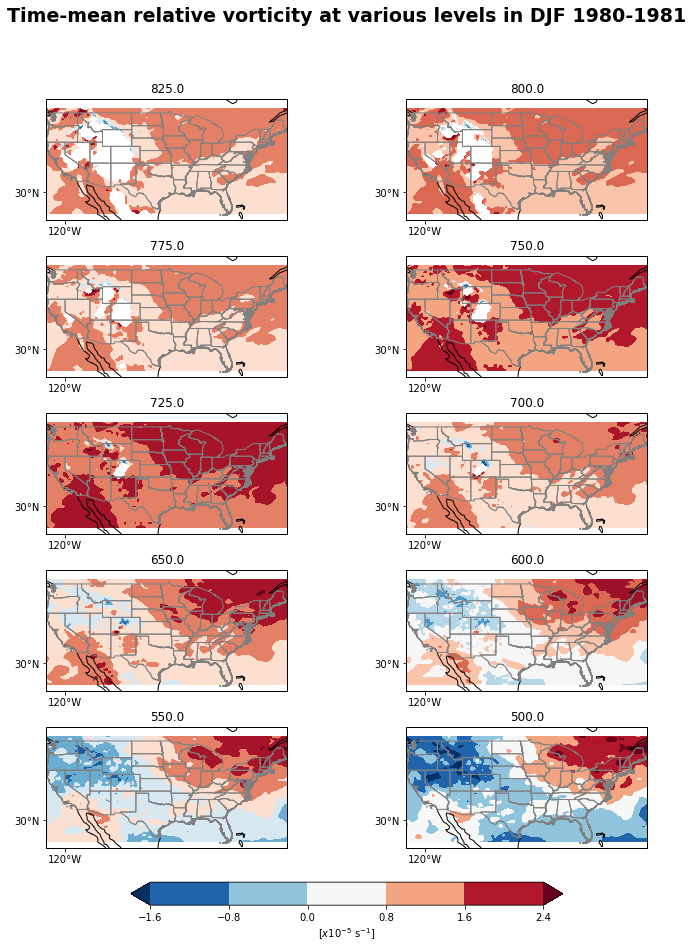

In [26]:
us_shapes = list(shpreader.Reader("/scratch/areed29/gadm36_USA_shp/gadm36_USA_1.shp"
).geometries())
# Define the figure and each axis for the 5 rows and 2 columns
fig, axs = plt.subplots(nrows=5,ncols=2,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(10,16))
# axs is a 2 dimensional array of `GeoAxes`.  
# We will flatten it into a 1-D array
axs=axs.flatten()
#Loop over all of the months and plot
for i,level in enumerate(levels):

        data=vort_list[i]

        # Add the cyclic point
        #data,lons=add_cyclic_point(data,coord=lon)

        # Contour plot
        cs=axs[i].contourf(lon,lat,data*100000,
                          transform = ccrs.PlateCarree(),
                          cmap='RdBu_r',extend='both')

        # Longitude and latitude labels
        xyticks(axs[i],lon,u_wind['lat'])
        # Title each subplot with the name of the month
        axs[i].set_title(level)

        # Draw the coastines for each subplot
        axs[i].coastlines()
        axs[i].set_extent([-124.5,-66.8,23.486,49])
        axs[i].add_geometries(us_shapes, ccrs.PlateCarree(), edgecolor='gray',
                  facecolor='none')

# Adjust the location of the subplots on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.0, right=1,
                    wspace=0.0, hspace=0.3) #0.1, 0.5
# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.2, 0.6, 0.02])
cbar = fig.colorbar(cs, cax = cbar_ax, orientation = 'horizontal', label= '[$x10^{-5}$ s$^{-1}$]', pad = 0.05)
# Add a big title at the top
plt.suptitle('Time-mean relative vorticity at various levels in DJF 1980-1981',fontsize=19, fontweight='bold')
plt.savefig('/homes/areed29/CLIM997/summer22_research/allvortlevels_conus.png')


In [3]:
u_vals_700=u_wind['U'].sel(lev=700.0)
u_vals_700

<xarray.DataArray 'U' (time: 62336, lat: 53, lon: 113)>
[373330304 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 ... 2022-08-31T18:00:00
  * lon      (lon) float64 -126.2 -125.6 -125.0 -124.4 ... -57.5 -56.88 -56.25
  * lat      (lat) float64 24.5 25.0 25.5 26.0 26.5 ... 48.5 49.0 49.5 50.0 50.5
    lev      float64 700.0
Attributes:
    standard_name:   eastward_wind
    long_name:       Eastward wind component
    units:           m/s
    fmissing_value:  1000000000000000.0
    vmax:            1000000000000000.0
    vmin:            -1000000000000000.0

In [6]:
u_mean=u_vals_700.mean(dim='time')
u_mean

<xarray.DataArray 'U' (lat: 53, lon: 113)>
array([[ 7.5593792e-02,  1.9286309e-01,  3.0773786e-01, ...,
        -2.5477162e-01, -3.1284389e-01, -3.7371418e-01],
       [ 2.9954752e-01,  4.1796997e-01,  5.3398925e-01, ...,
         1.2290769e-01,  6.2284861e-02,  1.0393236e-03],
       [ 5.2886784e-01,  6.4795297e-01,  7.6422852e-01, ...,
         5.1575667e-01,  4.5291159e-01,  3.9252126e-01],
       ...,
       [ 5.4190035e+00,  4.9194732e+00,  5.1120825e+00, ...,
         9.6533241e+00,  9.8153305e+00,  9.6655388e+00],
       [ 4.5356421e+00,  4.8098140e+00,  4.8379297e+00, ...,
         9.2657318e+00,  9.5039387e+00,  9.3716431e+00],
       [ 4.8904815e+00,  5.1428990e+00,  5.2195883e+00, ...,
         8.7920132e+00,  8.8544140e+00,  8.9905062e+00]], dtype=float32)
Coordinates:
  * lon      (lon) float64 -126.2 -125.6 -125.0 -124.4 ... -57.5 -56.88 -56.25
  * lat      (lat) float64 24.5 25.0 25.5 26.0 26.5 ... 48.5 49.0 49.5 50.0 50.5
    lev      float64 700.0

In [7]:
f= '/project/xprecip/merra2_ncfiles/winds/winds_morelevels_mean_9-20-22/winds_computed/v_computed.nc'
v_wind=xr.open_dataset(f)
v_wind

<xarray.Dataset>
Dimensions:  (lat: 53, lev: 10, lon: 113, time: 62336)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 ... 2022-08-31T18:00:00
  * lon      (lon) float64 -126.2 -125.6 -125.0 -124.4 ... -57.5 -56.88 -56.25
  * lat      (lat) float64 24.5 25.0 25.5 26.0 26.5 ... 48.5 49.0 49.5 50.0 50.5
  * lev      (lev) float64 825.0 800.0 775.0 750.0 ... 650.0 600.0 550.0 500.0
Data variables:
    V        (time, lev, lat, lon) float32 ...

In [5]:
v_vals_700=v_wind['V'].sel(lev=700.0)
v_vals_700

<xarray.DataArray 'V' (time: 62336, lat: 53, lon: 113)>
[373330304 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 ... 2022-08-31T18:00:00
  * lon      (lon) float64 -126.2 -125.6 -125.0 -124.4 ... -57.5 -56.88 -56.25
  * lat      (lat) float64 24.5 25.0 25.5 26.0 26.5 ... 48.5 49.0 49.5 50.0 50.5
    lev      float64 700.0
Attributes:
    standard_name:   northward_wind
    long_name:       Northward wind component
    units:           m/s
    fmissing_value:  1000000000000000.0
    vmax:            1000000000000000.0
    vmin:            -1000000000000000.0

In [8]:
v_mean=v_vals_700.mean(dim='time')
v_mean

<xarray.DataArray 'V' (lat: 53, lon: 113)>
array([[-0.9415221 , -0.9049703 , -0.8658747 , ...,  0.26003233,
         0.22944777,  0.19881845],
       [-1.050934  , -1.011403  , -0.96905607, ...,  0.31244424,
         0.2832144 ,  0.25108543],
       [-1.1609674 , -1.1188117 , -1.0737863 , ...,  0.36898667,
         0.33899793,  0.30387026],
       ...,
       [ 2.9514792 ,  3.1634798 ,  2.8487968 , ...,  1.1709456 ,
         1.3368287 ,  1.3193302 ],
       [ 3.462943  ,  3.0407295 ,  2.7863348 , ...,  1.081642  ,
         1.0681418 ,  1.2112676 ],
       [ 3.3119006 ,  3.1141174 ,  3.2249973 , ...,  0.98306406,
         0.8667972 ,  1.0764245 ]], dtype=float32)
Coordinates:
  * lon      (lon) float64 -126.2 -125.6 -125.0 -124.4 ... -57.5 -56.88 -56.25
  * lat      (lat) float64 24.5 25.0 25.5 26.0 26.5 ... 48.5 49.0 49.5 50.0 50.5
    lev      float64 700.0

In [10]:
vort = mg.hcurl(u_mean,v_mean,u_mean['lat'],u_mean['lon'])
vort
new_vort=vort*100000

In [11]:
vort

array([[            nan,             nan,             nan, ...,
                    nan,             nan,             nan],
       [            nan, -3.41182167e-06, -3.36994658e-06, ...,
        -7.43724671e-06, -7.36830299e-06,             nan],
       [            nan, -3.42680188e-06, -3.35510797e-06, ...,
        -7.67571818e-06, -7.66223556e-06,             nan],
       ...,
       [            nan,  6.83679643e-06, -5.09752367e-07, ...,
         1.20282981e-05,  8.25988903e-06,             nan],
       [            nan, -8.64124359e-06, -1.77352634e-06, ...,
         8.47426771e-06,  1.18384204e-05,             nan],
       [            nan,             nan,             nan, ...,
                    nan,             nan,             nan]])

In [12]:
print(np.shape(vort))

(53, 113)


Text(0.5, 1.0, 'Time-mean Relative Vorticity with wind vectors at 700mb from 1980-2022')

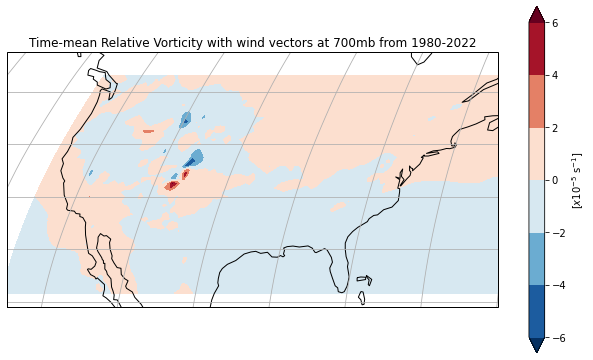

In [15]:
fig = plt.figure(figsize=(11,8.5))
ax=plt.axes(projection=ccrs.Robinson())

cs=ax.contourf(lon, lat, new_vort,transform = ccrs.PlateCarree(),cmap='RdBu_r',extend='both')
ax.set_extent([-124.5,-66.8,23.486,49])
ax.coastlines()
ax.gridlines()
cbar=plt.colorbar(cs, shrink=0.75,label='[$x10^{-5}$ s$^{-1}$]')
#superimposing wind vectors
#ax.quiver(lon, lat, u_mean.values, v_mean.values, minlength=0.1, scale_units='xy',scale=0.0001, transform=ccrs.PlateCarree(), color='k',width=0.001)
plt.title('Time-mean Relative Vorticity with wind vectors at 700mb from 1980-2022')


In [22]:
#Exploring other levels for fun
u_vals_825=u_wind['U'].sel(lev=775.0)
u_vals_825


<xarray.DataArray 'U' (time: 62336, lat: 53, lon: 113)>
[373330304 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 ... 2022-08-31T18:00:00
  * lon      (lon) float64 -126.2 -125.6 -125.0 -124.4 ... -57.5 -56.88 -56.25
  * lat      (lat) float64 24.5 25.0 25.5 26.0 26.5 ... 48.5 49.0 49.5 50.0 50.5
    lev      float64 775.0
Attributes:
    standard_name:   eastward_wind
    long_name:       Eastward wind component
    units:           m/s
    fmissing_value:  1000000000000000.0
    vmax:            1000000000000000.0
    vmin:            -1000000000000000.0

In [23]:
v_vals_825=v_wind['V'].sel(lev=775.0)
v_vals_825

<xarray.DataArray 'V' (time: 62336, lat: 53, lon: 113)>
[373330304 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 ... 2022-08-31T18:00:00
  * lon      (lon) float64 -126.2 -125.6 -125.0 -124.4 ... -57.5 -56.88 -56.25
  * lat      (lat) float64 24.5 25.0 25.5 26.0 26.5 ... 48.5 49.0 49.5 50.0 50.5
    lev      float64 775.0
Attributes:
    standard_name:   northward_wind
    long_name:       Northward wind component
    units:           m/s
    fmissing_value:  1000000000000000.0
    vmax:            1000000000000000.0
    vmin:            -1000000000000000.0

In [24]:
u_mean_825=u_vals_825.mean(dim='time')
v_mean_825=v_vals_825.mean(dim='time')

In [25]:
vort_825 = mg.hcurl(u_mean_825,v_mean_825,lat,lon)
vort_825
new_vort_825=vort_825*100000

Text(0.5, 1.0, 'Time-mean Relative Vorticity with wind vectors at 775mb from 1980-2022')

/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


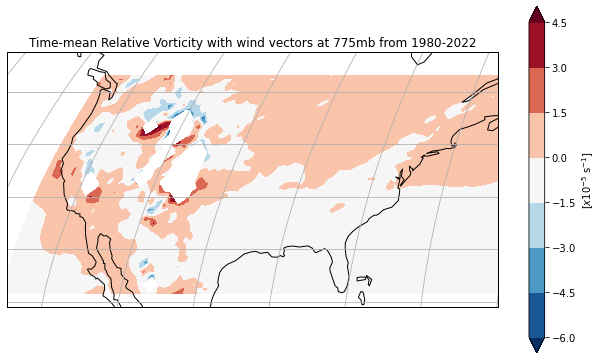

In [26]:
fig = plt.figure(figsize=(11,8.5))
ax=plt.axes(projection=ccrs.Robinson())

cs=ax.contourf(lon, lat, new_vort_825,transform = ccrs.PlateCarree(),cmap='RdBu_r',extend='both')
ax.set_extent([-124.5,-66.8,23.486,49])
ax.coastlines()
ax.gridlines()
cbar=plt.colorbar(cs, shrink=0.75,label='[$x10^{-5}$ s$^{-1}$]')
#superimposing wind vectors
#ax.quiver(lon, lat, u_mean.values, v_mean.values, minlength=0.1, scale_units='xy',scale=0.0001, transform=ccrs.PlateCarree(), color='k',width=0.001)
plt.title('Time-mean Relative Vorticity with wind vectors at 775mb from 1980-2022')


In [ ]:
# Define the figure and each axis for the 3 rows and 4 columns
fig, axs = plt.subplots(nrows=3,ncols=4,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(16,10))
# axs is a 2 dimensional array of `GeoAxes`.  
# We will flatten it into a 1-D array
axs=axs.flatten()
#Loop over all of the months and plot
for i,level in enumerate(u_wind['lev']):

        # Select the month
        data=precip_rate_ens.sel(lev=level)

        # Add the cyclic point
        data,lons=add_cyclic_point(data,coord=u_wind['lon'])

        # Contour plot
        cs=axs[i].contourf(lons,u_wind['lat'],data,
                          transform = ccrs.PlateCarree(),
                          cmap='RdBu_r',extend='both')

        # Longitude and latitude labels
        xyticks(axs[i],lons,u_wind['lat'])
        # Title each subplot with the name of the month
        axs[i].set_title(level[i])

        # Draw the coastines for each subplot
        axs[i].coastlines()
        
# Adjust the location of the subplots on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.0, right=1,
                    wspace=0.0, hspace=0.3) #0.1, 0.5
# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.2, 0.6, 0.02])
cbar = fig.colorbar(cs, cax = cbar_ax, orientation = 'horizontal', label= '[$x10^{-5}$ s$^{-1}$]', pad = 0.05)
# Add a big title at the top
plt.suptitle('Time-mean relative vorticity at various levels from 1980-2022',fontsize=19, fontweight='bold')
#plt.savefig('/homes/areed29/CLIM751/data_analysis_project/verification_prate_jan1980.png')
